# Exploratory Data Analysis

First we check if our data consist of incorrect information and to do so we produce general statistics of the numerical data and also observe what consitute the categorical data. We decided to not excluded outliers from our analysis. One obvious error we found was that one of the record in gender column had value 'Title: Senior Software Engineer', which we replaced with nan. 



In [1]:
import pandas as pd
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt
import statistics
import seaborn as sn

from scipy.stats import mannwhitneyu
from sklearn.decomposition import PCA


stem_data = pd.read_csv('Levels_Fyi_Salary_Data.csv')
stem_data.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [2]:
stem_data.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
count,6.264200e+04,62642.000000,62642.000000,6.264200e+04,6.264200e+04,62642.000000,62642.000000,62640.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000
mean,2.163004e+05,7.204135,2.702093,1.366873e+05,5.148608e+04,19334.746588,9856.201989,616.097222,41694.723732,0.245698,0.201223,0.028783,0.005108,0.005667,0.187925,0.128221,0.012835,0.011015,0.018039
std,1.380337e+05,5.840375,3.263656,6.136928e+04,8.187457e+04,26781.292040,6679.104563,289.843390,24488.865879,0.430504,0.400917,0.167196,0.071291,0.075067,0.390655,0.334338,0.112562,0.104373,0.133094
min,1.000000e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.350000e+05,3.000000,0.000000,1.080000e+05,0.000000e+00,1000.000000,7369.000000,506.000000,20069.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.880000e+05,6.000000,2.000000,1.400000e+05,2.500000e+04,14000.000000,7839.000000,807.000000,42019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.640000e+05,10.000000,4.000000,1.700000e+05,6.500000e+04,26000.000000,11521.000000,807.000000,63021.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.980000e+06,69.000000,69.000000,1.659870e+06,2.800000e+06,1000000.000000,47926.000000,881.000000,83875.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
cat_data = stem_data.select_dtypes(exclude=["number","bool_"])
cat_data.columns

for c in cat_data.columns:
    if cat_data[c].nunique() < 10:
        print(c)
        print("\t",stem_data[c].unique())

gender
	 [nan 'Male' 'Female' 'Other' 'Title: Senior Software Engineer']
Race
	 [nan 'White' 'Asian' 'Black' 'Two Or More' 'Hispanic']
Education
	 [nan 'PhD' "Master's Degree" "Bachelor's Degree" 'Some College'
 'Highschool']


In [4]:
stem_data['gender'] = np.where(stem_data['gender'] == 'Title: Senior Software Engineer', np.nan, stem_data['gender'])

In [5]:
for c in stem_data.columns:
    print(c)
    print("\t number of nans", round(len(stem_data[stem_data[c].isna() == True])/len(stem_data),2))
    print("\t number of distinct values", stem_data[c].nunique())

timestamp
	 number of nans 0.0
	 number of distinct values 62561
company
	 number of nans 0.0
	 number of distinct values 1631
level
	 number of nans 0.0
	 number of distinct values 2923
title
	 number of nans 0.0
	 number of distinct values 15
totalyearlycompensation
	 number of nans 0.0
	 number of distinct values 893
location
	 number of nans 0.0
	 number of distinct values 1050
yearsofexperience
	 number of nans 0.0
	 number of distinct values 65
yearsatcompany
	 number of nans 0.0
	 number of distinct values 81
tag
	 number of nans 0.01
	 number of distinct values 3058
basesalary
	 number of nans 0.0
	 number of distinct values 482
stockgrantvalue
	 number of nans 0.0
	 number of distinct values 612
bonus
	 number of nans 0.0
	 number of distinct values 335
gender
	 number of nans 0.31
	 number of distinct values 3
otherdetails
	 number of nans 0.36
	 number of distinct values 12841
cityid
	 number of nans 0.0
	 number of distinct values 1045
dmaid
	 number of nans 0.0
	 number of

In order to compute correlation matrix we need to convert categorial data into one hot encoding. Some of the categorical data have too many distinct values such as company (1631), level (2923) and location (1050). If we keep these columns, we have over 2000 eigenvalues greater than 1. Additionally, the pca.explained_variance_ratio is very very low. For reference, the highest pca.explained_variance_ratio was 0.0008. So, we decided to take these columns out. We removed those along with irrelevant columns such as timestamp, tag and rowNumber. Since we already have one hot encoding of race and education we can remove those columns as well.

For the selected cateogrical data (education, gender and race) we replace nans with "unknown" so that we can include them in our analysis.


In [6]:
selected_stem_data = stem_data.copy()
drop_cols = ["company", "timestamp", "tag", "otherdetails", "dmaid", "Race", "Education", "cityid", "rowNumber", "location", "level"]
selected_stem_data = selected_stem_data.drop(columns = drop_cols)
print("Number of columns:", len(selected_stem_data.columns))

Number of columns: 18


In [7]:
selected_stem_data = pd.get_dummies(selected_stem_data, columns = ['gender'])
print("Number of columns:", len(selected_stem_data.columns))

Number of columns: 20


In [8]:
selected_stem_data["Race_Unknown"] = np.where((selected_stem_data["Race_Asian"] == 0)&
                                               (selected_stem_data["Race_White"] == 0)&
                                               (selected_stem_data["Race_Two_Or_More"] == 0)&
                                               (selected_stem_data["Race_Black"] == 0)&
                                               (selected_stem_data["Race_Hispanic"] == 0),
                                               1,
                                               0)

selected_stem_data["gender_Unknown"] = np.where((selected_stem_data["gender_Female"] == 0)&
                                               (selected_stem_data["gender_Male"] == 0)&
                                               (selected_stem_data["gender_Other"] == 0),
                                               1,
                                               0)

selected_stem_data["Education_Unknown"] = np.where((selected_stem_data["Masters_Degree"] == 0)&
                                               (selected_stem_data["Bachelors_Degree"] == 0)&
                                               (selected_stem_data["Doctorate_Degree"] == 0)&
                                               (selected_stem_data["Highschool"] == 0)&
                                               (selected_stem_data["Some_College"] == 0),
                                               1,
                                               0)
print("Number of columns:", len(selected_stem_data.columns))
selected_stem_data.head()
                                               

Number of columns: 23


,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,Masters_Degree,Bachelors_Degree,Doctorate_Degree,...,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,gender_Female,gender_Male,gender_Other,Race_Unknown,gender_Unknown,Education_Unknown
0,Product Manager,127000,1.5,1.5,107000.0,20000.0,10000.0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,Software Engineer,100000,5.0,3.0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
2,Product Manager,310000,8.0,0.0,155000.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
3,Software Engineering Manager,372000,7.0,5.0,157000.0,180000.0,35000.0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
4,Software Engineer,157000,5.0,3.0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,1,1,1


# 1.1  Correlation

We have computed correlation matrix for 23 columns and found some variables worth noting.
1.  **total yearly compensation** is higly correlated with **stock grant value** (0.77), **base salary** (0.67) and **bonus** (0.49), which makes sense as total yearly compensation is a sum of those three variables. 
2. **education unknown** and **race unknown** (0.72), **gender unknown** and **race unknown** (0.49), **education unknown** and **gender unknown** (0.47), which means individuals who did not report one variable are likely to also not report the other variable. 
3. **year of experience** and **year at company** (0.52), which is plausible since the longer an individual stays at a company more they gain experience, and it is not very highly correlated because individuals could change their position to a new field while they stay at a company.  


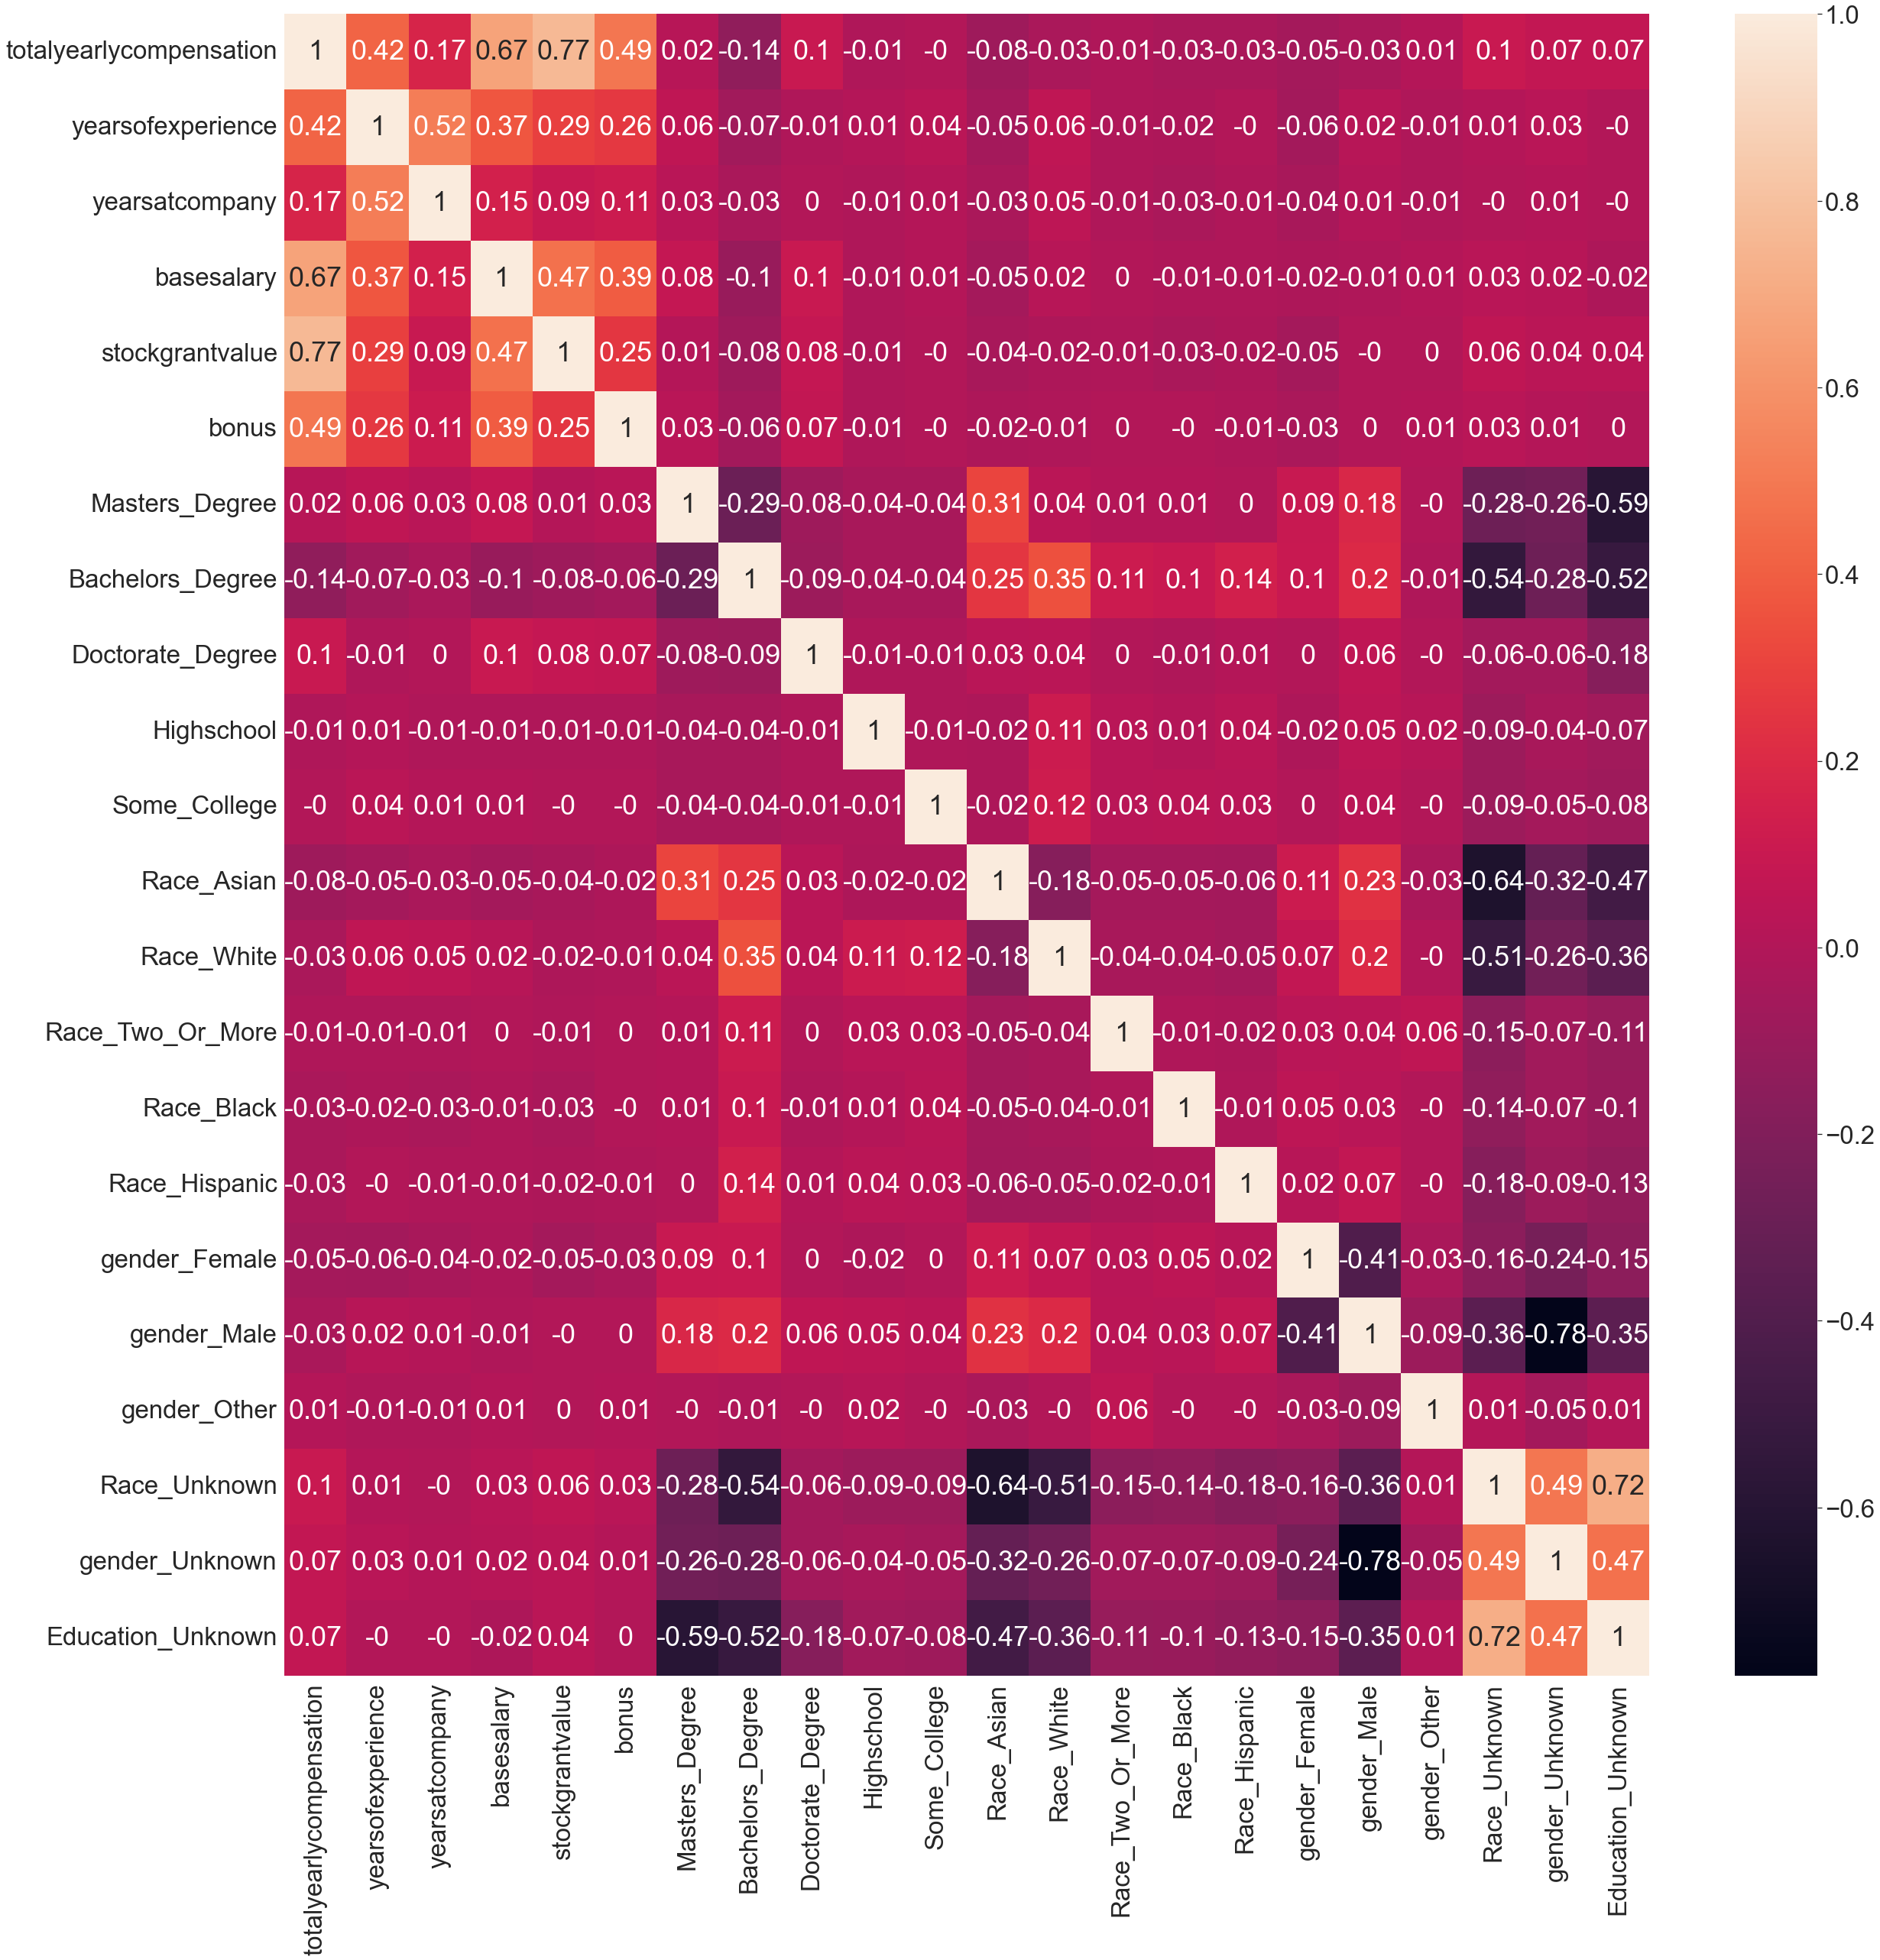

In [9]:
from functools import reduce

corrMatrix =selected_stem_data.corr().round(2)
plt.figure(figsize=(40,40))
sn.set(font_scale=3)
sn.heatmap(corrMatrix, annot=True)
plt.show()

# 1.2 Regression

Next, we performed a multiple linear regression on our data, by predicting total yearly compensation based on years of experience, level of edcation (Masters Degree, Bachelors Degree, Highschool, Some College and Unknown) and race (Asian, White, Two or More”, Black, Hispanic and Unknown). 


<Figure size 432x288 with 0 Axes>

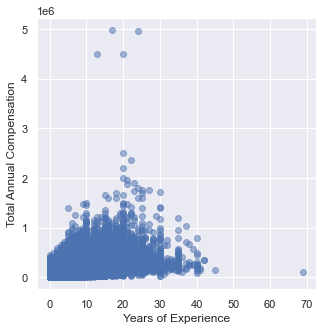

In [41]:
f = plt.figure()
plt.figure(figsize =(5,5))
plt.scatter(selected_stem_data['yearsofexperience'], selected_stem_data['totalyearlycompensation'], alpha = 0.5)
plt.xlabel("Years of Experience")
plt.ylabel("Total Annual Compensation")
plt.show()

In [42]:
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


#During EDA we found that totalyearlycompensation and yearsofexperience does not have any missing data, so need to
#fill missing data
compensation = selected_stem_data['totalyearlycompensation']

data_new = selected_stem_data[["yearsofexperience", "Masters_Degree", "Bachelors_Degree", "Highschool", 
                               "Some_College", "Education_Unknown", "Race_Asian", "Race_White", "Race_Two_Or_More", "Race_Black", 
                               "Race_Hispanic", "Race_Unknown"]]

## Ordinary Linear Regression

In [43]:
#Split the data into training and testing as the ratio 0.80: 0.20.
data_train, data_test, compensation_train, compensation_test = train_test_split(data_new, compensation, test_size=0.2, random_state = 111)

from sklearn.metrics import mean_squared_error, r2_score
#linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(data_train, compensation_train)

# Make predictions 
compensation_pred_test = regr.predict(data_test)
compensation_pred_train = regr.predict(data_train)

# The coefficients
#print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Root mean squared error for training part: %.2f" % mean_squared_error(compensation_train, compensation_pred_train, squared=False))
print("Root mean squared error for testing part: %.2f" % mean_squared_error(compensation_test, compensation_pred_test, squared=False))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(compensation_test, compensation_pred_test))

Root mean squared error for training part: 124795.96
Root mean squared error for testing part: 117015.23
Coefficient of determination: 0.22


In [44]:
rSqr_train = sklearn.metrics.r2_score(compensation_train, compensation_pred_train)
rSqr_test = sklearn.metrics.r2_score(compensation_test, compensation_pred_test)
print("R-squared score for training data set:", rSqr_train)
print("R-squared score for testing data set:" , rSqr_test)

R-squared score for training data set: 0.19935427642536274
R-squared score for testing data set: 0.21565682839206424


## Ridge Regression

In [45]:
from sklearn.linear_model import Ridge
ridge_alphas = [0.0, 1e-8, 1e-5, 0.1, 1, 10]
ridge_trainerrors = []
ridge_testerrors = []

for i in range(len(ridge_alphas)):
    rAlpha = Ridge(alpha=ridge_alphas[i])
    rAlpha.fit(data_train, compensation_train)
    
    trainError = mean_squared_error(compensation_train, rAlpha.predict(data_train), squared=False)
    testError = mean_squared_error(compensation_test, rAlpha.predict(data_test), squared=False)
    
    ridge_trainerrors.append(trainError)
    ridge_testerrors.append(testError)

arr = np.array(ridge_testerrors)
print("Optimal Alpha:", ridge_alphas[np.argmin(arr)])
print("Train RMSE:", ridge_trainerrors)
print("Test RMSE :", ridge_testerrors)


Optimal Alpha: 10
Train RMSE: [124795.96135409629, 124795.96135409629, 124795.96135409696, 124795.98783975083, 124796.12022466025, 124798.10329771356]
Test RMSE : [117015.22553355696, 117015.22553354451, 117015.22552109373, 117015.11196370824, 117014.25390638788, 117008.23650856872]


## Lasso Regression

In [46]:
import warnings 
from sklearn.linear_model import Lasso
warnings.filterwarnings('ignore')

#Question 2.3
lasso_alphas = [1e-3, 1e-2, 1e-1, 1]
lasso_trainerrors = []
lasso_testerrors = []

for i in range(len(lasso_alphas)):
    lAlpha = Lasso(alpha=lasso_alphas[i])
    lAlpha.fit(data_train, compensation_train)
    
    trainError = mean_squared_error(compensation_train, lAlpha.predict(data_train), squared=False)
    testError = mean_squared_error(compensation_test, lAlpha.predict(data_test), squared=False)
    
    lasso_trainerrors.append(trainError)
    lasso_testerrors.append(testError)

arr = np.array(lasso_testerrors)
print("Optimal Alpha:", lasso_alphas[np.argmin(arr)])    
print("Train RMSE:", lasso_trainerrors)
print("Test RMSE:", lasso_testerrors)


Optimal Alpha: 1
Train RMSE: [124796.18493027145, 124796.18438429957, 124796.17901536802, 124796.1344047703]
Test RMSE: [117015.16906339278, 117015.16392595612, 117015.11260929862, 117014.60521366623]


In [47]:
#reprint for report
print("Ordinary Linear Regression:")
print("Train RMSE: %.2f" % mean_squared_error(compensation_train, compensation_pred_train, squared=False))
print("Test RMSE: %.2f" % mean_squared_error(compensation_test, compensation_pred_test, squared=False))
print("\nRidge Regression:")
print("Train RMSE:", {ridge_alphas[i]: round(ridge_trainerrors[i],2) for i in range(len(ridge_trainerrors))})
print("Test RMSE:", {ridge_alphas[i]: round(ridge_testerrors[i],2) for i in range(len(ridge_testerrors))})
print("\nLasso Regression:")
print("Train RMSE:",{lasso_alphas[i]: round(lasso_trainerrors[i],2) for i in range(len(lasso_trainerrors))})
print("Test RMSE:",{lasso_alphas[i]: round(lasso_testerrors[i],2) for i in range(len(lasso_testerrors))})

Ordinary Linear Regression:
Train RMSE: 124795.96
Test RMSE: 117015.23

Ridge Regression:
Train RMSE: {0.0: 124795.96, 1e-08: 124795.96, 1e-05: 124795.96, 0.1: 124795.99, 1: 124796.12, 10: 124798.1}
Test RMSE: {0.0: 117015.23, 1e-08: 117015.23, 1e-05: 117015.23, 0.1: 117015.11, 1: 117014.25, 10: 117008.24}

Lasso Regression:
Train RMSE: {0.001: 124796.18, 0.01: 124796.18, 0.1: 124796.18, 1: 124796.13}
Test RMSE: {0.001: 117015.17, 0.01: 117015.16, 0.1: 117015.11, 1: 117014.61}


# 2. Hypothesis Test 

#### 2.1. Do female get paid differently then men?

We decided to use Mann-Whitney U test to test our the null hypothesis that the distribution underlying female is the same as the distribution underlying male, and found p-value 1.356e-14. Hence, we reject our null hypothesis that they are paid similarly. Note: female to male ratio is 1:4. 

In [48]:
gender_data = stem_data.copy()[["totalyearlycompensation", "gender"]]
agg_gender = gender_data.groupby(["gender"])["totalyearlycompensation"].agg(n = len, median = 'median', mean = 'mean').round(0)
agg_gender["percentage"] = round(agg_gender[["n"]]/sum(agg_gender[["n"]]["n"])*100, 1)
print(agg_gender)

            n  median      mean  percentage
gender                                     
Female   6999  175000  195120.0        16.2
Male    35702  185000  212447.0        82.8
Other     400  195000  232348.0         0.9


In [49]:
gg_gender = stem_data.groupby(["gender"])["totalyearlycompensation"].agg(n = len, median = 'median', mean = 'mean').round(0)
agg_gender["percentage"] = round(agg_gender[["n"]]/sum(agg_gender[["n"]]["n"])*100, 1)
print(agg_gender)

            n  median      mean  percentage
gender                                     
Female   6999  175000  195120.0        16.2
Male    35702  185000  212447.0        82.8
Other     400  195000  232348.0         0.9


<AxesSubplot:xlabel='totalyearlycompensation', ylabel='gender'>

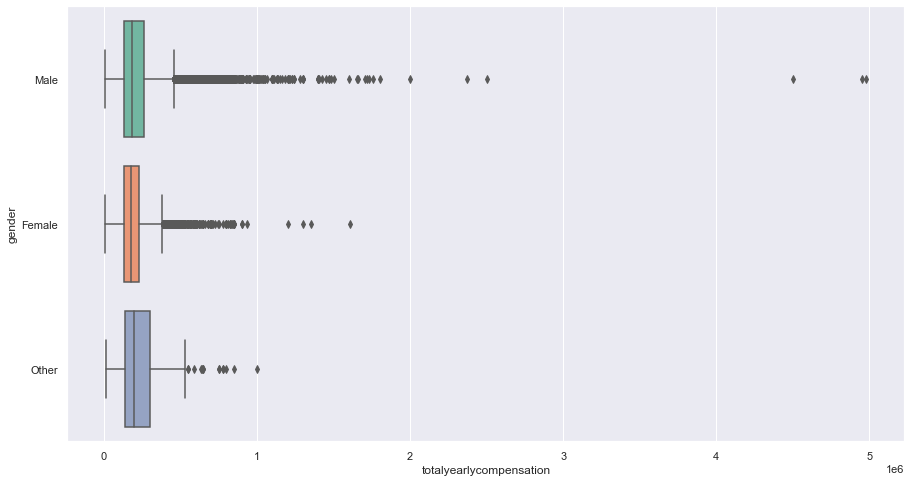

In [50]:
plt.figure(figsize = (15,8))
sn.boxplot(x="totalyearlycompensation", y="gender", data=gender_data, orient="h", palette="Set2")

In [51]:
female_salaries = selected_stem_data.loc[selected_stem_data['gender_Female'] == 1]['totalyearlycompensation']
male_salaries = selected_stem_data.loc[selected_stem_data['gender_Male'] == 1]['totalyearlycompensation']

In [52]:
print(female_salaries[female_salaries.isnull() == True].count())
print(male_salaries[male_salaries.isnull() == True].count())


0
0


In [53]:
u1, p1 = mannwhitneyu(female_salaries, male_salaries, alternative = 'two-sided')
print(p1)  
print(u1)

1.3564129055940676e-14
117678059.5


#### 2.2 Is there a relationship between participants’ genders and their job titles? 

We decided to use chi-squared methiod to test our null hypothesis is that the categorical data (gender and job title) has the given frequencies (are assumed to be equally likely). We found p-value 0.0, so we reject the null hypothesis that the gender and job title are ewqually likely. 


In [54]:
gender_title_data = stem_data.copy()[[ "gender","title"]]
gender_title_data["gender"] = np.where(gender_title_data["gender"].isna() == True, "unknown", gender_title_data["gender"])

crosstab = pd.crosstab(gender_title_data['title'],gender_title_data['gender'])
print(crosstab)

from scipy import stats
stats.chi2_contingency(crosstab)

gender                        Female   Male  Other  unknown
title                                                      
Business Analyst                 169    356      2      358
Data Scientist                   361   1357     22      838
Hardware Engineer                156   1356     15      673
Human Resources                  126     77      4      157
Management Consultant            150    466      4      356
Marketing                        203    216      4      287
Mechanical Engineer               41    263      0      186
Product Designer                 514    612     17      373
Product Manager                  871   2167     25     1610
Recruiter                        163    111      0      177
Sales                             86    193      1      181
Software Engineer               3623  25101    270    12237
Software Engineering Manager     221   2057     24     1267
Solution Architect                62    735      7      353
Technical Program Manager        253    

(2964.439088370925,
 0.0,
 42,
 array([[9.88811820e+01, 5.04394336e+02, 5.65116056e+00, 2.76073321e+02],
        [2.88040324e+02, 1.46929785e+03, 1.64617988e+01, 8.04200026e+02],
        [2.45806328e+02, 1.25386163e+03, 1.40480828e+01, 6.86283963e+02],
        [4.06697743e+01, 2.07457105e+02, 2.32431915e+00, 1.13548801e+02],
        [1.09048626e+02, 5.56258612e+02, 6.23224035e+00, 3.04460522e+02],
        [7.93284059e+01, 4.04655343e+02, 4.53369943e+00, 2.21482552e+02],
        [5.47477731e+01, 2.79269180e+02, 3.12889116e+00, 1.52854155e+02],
        [1.69382906e+02, 8.64024648e+02, 9.68040612e+00, 4.72912040e+02],
        [5.22114987e+02, 2.66331608e+03, 2.98394049e+01, 1.45772953e+03],
        [5.03902972e+01, 2.57041633e+02, 2.87985696e+00, 1.40688212e+02],
        [5.15075987e+01, 2.62741004e+02, 2.94371189e+00, 1.43807685e+02],
        [4.60674578e+03, 2.34990767e+04, 2.63280227e+02, 1.28618973e+04],
        [3.98764902e+02, 2.03410552e+03, 2.27898215e+01, 1.11333976e+03],
       

In [58]:
gender_data = gender_title_data.loc[(gender_title_data["gender"] == "Female")|(gender_title_data["gender"] == "Male")]

crosstab = pd.crosstab(gender_data['title'],gender_data['gender'])
print(crosstab)

from scipy import stats
stats.chi2_contingency(crosstab)


gender                        Female   Male
title                                      
Business Analyst                 169    356
Data Scientist                   361   1357
Hardware Engineer                156   1356
Human Resources                  126     77
Management Consultant            150    466
Marketing                        203    216
Mechanical Engineer               41    263
Product Designer                 514    612
Product Manager                  871   2167
Recruiter                        163    111
Sales                             86    193
Software Engineer               3623  25101
Software Engineering Manager     221   2057
Solution Architect                62    735
Technical Program Manager        253    635


(2779.63727728949,
 0.0,
 14,
 array([[   86.05126344,   438.94873656],
        [  281.5925154 ,  1436.4074846 ],
        [  247.8276387 ,  1264.1723613 ],
        [   33.2731552 ,   169.7268448 ],
        [  100.96681577,   515.03318423],
        [   68.67710358,   350.32289642],
        [   49.82777921,   254.17222079],
        [  184.55947168,   941.44052832],
        [  497.94997775,  2540.05002225],
        [   44.91056416,   229.08943584],
        [   45.7301    ,   233.2699    ],
        [ 4708.06950657, 24015.93049343],
        [  373.38052973,  1904.61947027],
        [  130.63401325,   666.36598675],
        [  145.54956558,   742.45043442]]))

#### 2.3 Is there a difference in salary between participants with increasing education degree attained?

We used two statistical test to test our hypothesis about whether obtaining a step higher degree makes a difference in the total yearly compensation. 

1. The Kruskal-Wallis to test the null hypothesis that the population median of all of the groups are equal and found all groups compared have p-value < 0.05, so we reject our null hypothesis. 

2. The one-way ANOVA to test the null hypothesis that the population mean of all of the groups are equal and found all groups compared have p-value < 0.05, so we reject our null hypothesis. 


In [59]:
phd_df = stem_data[stem_data["Education"] == "PhD"]["totalyearlycompensation"]
master_df = stem_data[stem_data["Education"] == "Master's Degree"]["totalyearlycompensation"]
bachelor_df = stem_data[stem_data["Education"] == "Bachelor's Degree"]["totalyearlycompensation"]
some_college_df = stem_data[stem_data["Education"] == "Some College"]["totalyearlycompensation"]
highschool_df = stem_data[stem_data["Education"] == "Highschool"]["totalyearlycompensation"]
all_education_level = [phd_df, master_df,bachelor_df, some_college_df,highschool_df]
education_level = ['PhD', "Master's Degree", "Bachelor's Degree", 'Some College', 'Highschool']

In [60]:
print("-"*20)
print("Kruskal-Wallis")
print("-"*20)
for i in range(len(all_education_level)-1):
    print(education_level[i], "vs", education_level[i+1])
    k1, p1 = stats.kruskal(all_education_level[i], all_education_level[i+1])
    print("p-value:", p1, "\n")
   
print("-"*20)

print("One-way ANOVA")
print("-"*20)

for i in range(len(all_education_level)-1):
    print(education_level[i], "vs", education_level[i+1])
    f1, p1 = stats.f_oneway(all_education_level[i], all_education_level[i+1])
    print( p1, "\n")

--------------------
Kruskal-Wallis
--------------------
PhD vs Master's Degree
p-value: 9.846722721661126e-114 

Master's Degree vs Bachelor's Degree
p-value: 7.608689003568636e-274 

Bachelor's Degree vs Some College
p-value: 1.1867520833224832e-06 

Some College vs Highschool
p-value: 0.027327114181910014 

--------------------
One-way ANOVA
--------------------
PhD vs Master's Degree
1.3883889327601241e-87 

Master's Degree vs Bachelor's Degree
7.721507230016225e-165 

Bachelor's Degree vs Some College
4.038253616907981e-07 

Some College vs Highschool
0.02102749209970819 



In [81]:
#### barchart for the report: number of gender categories within each education level

In [61]:
gender_education_data = stem_data[["gender", "Education"]]
gender_education_data["gender"] = np.where(gender_education_data["gender"].isna() == True, "unknown", gender_education_data["gender"])
gender_education_data["Education"] = np.where(gender_education_data["Education"].isna() == True, "unknown", gender_education_data["Education"])
gender_education_data.head()

,gender,Education
0,unknown,unknown
1,unknown,unknown
2,unknown,unknown
3,unknown,unknown
4,unknown,unknown


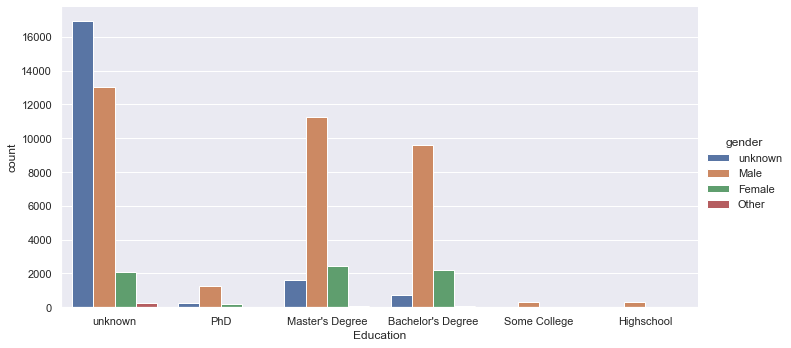

In [62]:
#plot for report
sn.catplot(x="Education", hue="gender", kind="count", data=gender_education_data, height=5, aspect=2)

# 3.1 Principal Component Analysis

The steps of PCA consist of:

### 1. Standardizing the data

The variance in the data might be merely due to difference in scale, so need to compute the z-scores such that mean is 0 and standard deviation is 1. 

### 2. Compute covariance matrix of the standardized data

Variables that are highly correlated with each other contains redundant information. 

### 3. Find the eigen values and eigen vectors of the covariance matrix

We obtain ... number of eigen values, which represents the magnitude of the eigen vectors. Eigen vectors gives us the direction of maximum variance. The largest eigen value gives us the first principal component in the direction of eigen vector.  


### 4. Select principal components

In order to determine the number of factors (principal components) we produced a scree plot. 20 factors out of 37 have eigen values above 1, so we decided not to use Kaiser criterion. Instead, we used elbow method to pick left of the biggest/sharpest drop. This would yield 2 factors.

### 5. Recast the data along the principal component axes



In [63]:
selected_stem_data2 = pd.get_dummies(selected_stem_data, columns = ['title'])
print("Number of columns:", len(selected_stem_data2.columns))

Number of columns: 37


In [64]:
#1. Standardize the data
from sklearn.preprocessing import StandardScaler
zscoredData = StandardScaler().fit_transform(selected_stem_data2) 
zscoredData

array([[-0.64695112, -0.97668048, -0.36833008, ..., -0.24579824,
        -0.13717725, -0.1501429 ],
       [-0.84255702, -0.37739915,  0.09128091, ..., -0.24579824,
        -0.13717725, -0.1501429 ],
       [ 0.67882222,  0.13627057, -0.82794107, ..., -0.24579824,
        -0.13717725, -0.1501429 ],
       ...,
       [ 0.02680255,  1.16361   ,  2.84894684, ..., -0.24579824,
        -0.13717725, -0.1501429 ],
       [ 0.46148233,  0.13627057,  0.39768823, ..., -0.24579824,
        -0.13717725, -0.1501429 ],
       [-0.11809071, -1.23351534, -0.82794107, ..., -0.24579824,
        -0.13717725, -0.1501429 ]])

In [65]:
#PCA() function of sklearn computes the covariance matrix for us and we can also obtain eigen values and eigen vectors from it.

# Run the PCA:
pca = PCA().fit(zscoredData)

#Eigenvalues: Single vector of eigenvalues in decreasing order of magnitude
eigVals = pca.explained_variance_
print(eigVals)


[3.71135616e+00 3.12704399e+00 1.84682070e+00 1.55117222e+00
 1.44604591e+00 1.28072229e+00 1.14335997e+00 1.10780402e+00
 1.08460955e+00 1.07803610e+00 1.05054435e+00 1.03795808e+00
 1.03584839e+00 1.03472687e+00 1.02516688e+00 1.02235990e+00
 1.01473529e+00 1.00906579e+00 1.00704341e+00 1.00367822e+00
 9.91584501e-01 9.86421968e-01 9.51852866e-01 9.23459630e-01
 8.99713423e-01 8.53816919e-01 8.40084292e-01 7.94651508e-01
 7.06782638e-01 4.83228453e-01 4.10403072e-01 3.87057433e-01
 1.50949505e-01 2.45659257e-03 2.97828934e-05 5.19718530e-30
 4.58426418e-30]


Number of eigen values above 1: 20 out of 37


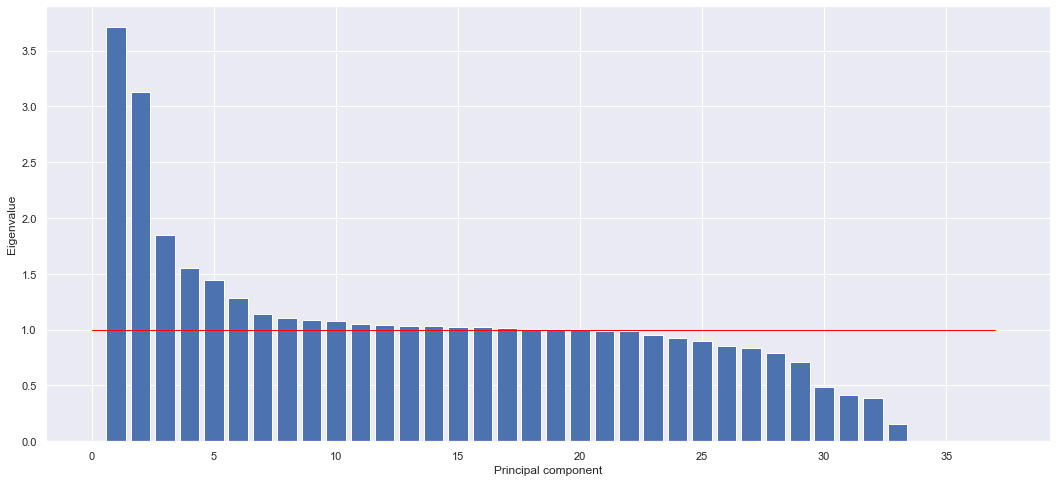

In [66]:
print("Number of eigen values above 1:", len(eigVals[eigVals>1]), "out of", len(eigVals))

# Plotting a bar graph of the sorted Eigenvalues
numClasses = 37
plt.figure(figsize=(18,8))
plt.bar(np.linspace(1,37,37),eigVals)
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.plot([0,numClasses],[1,1],color='red',linewidth=1) # Kaiser criterion line


In [67]:
tot = sum(eigVals)
var_exp = [( i /tot ) * 100 for i in sorted(eigVals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Variance Explained\n", var_exp)

print("\nCumulative Variance Explained by top 10 eigen values\n", cum_var_exp[2])

print("\nCumulative Variance Explained\n", cum_var_exp)
print(len(cum_var_exp[cum_var_exp.round(0)<=90]))

Variance Explained
 [10.030532203937817, 8.451335321000661, 4.991327614751805, 4.192290430026947, 3.908169810805013, 3.4613563263070954, 3.0901127552353183, 2.9940171298602705, 2.9313303694115946, 2.9135645590719723, 2.839263727213982, 2.8052473230781034, 2.7995455418078374, 2.7965144532795594, 2.7706770599700383, 2.7630907447263926, 2.742484042219486, 2.7271613012560385, 2.7216954949169896, 2.712600536798709, 2.6799153299387606, 2.665962758747714, 2.572534246650386, 2.4957969937645794, 2.43161908220565, 2.3075764552533737, 2.270461839902421, 2.1476724930237348, 1.91019285196749, 1.3060019978581823, 1.1091797852792469, 1.0460844711482387, 0.40796512217449427, 0.006639333388721113, 8.049302142532762e-05, 1.4046222533759752e-29, 1.2389705400120188e-29]

Cumulative Variance Explained by top 10 eigen values
 23.473195139690283

Cumulative Variance Explained
 [ 10.0305322   18.48186752  23.47319514  27.66548557  31.57365538
  35.03501171  38.12512446  41.11914159  44.05047196  46.96403652
 

In [68]:
# Loadings (eigenvectors): Weights per factor in terms of the original data. 
# Where do the  principal components point, in terms of the 34 variables?

loadings = pca.components_

loadings_df = pd.DataFrame(loadings.T, columns=["PC"+str(i) for i in range(1,38)], 
                           index=selected_stem_data2.columns)

loadings_df= loadings_df.abs().reset_index()
loadings_df.rename(columns = {"index": "question"}, inplace =True)

for i in range(0, 2):
    print(loadings_df.sort_values(by = ["PC" +str(i+1)], ascending = False)[["PC" +str(i+1), "question"]].head())
    print("\n")

         PC1           question
19  0.445811       Race_Unknown
21  0.423919  Education_Unknown
20  0.368612     gender_Unknown
7   0.302311   Bachelors_Degree
11  0.296291         Race_Asian


        PC2                 question
0  0.440092  totalyearlycompensation
3  0.393069               basesalary
1  0.371432        yearsofexperience
4  0.360532          stockgrantvalue
5  0.306315                    bonus




In [69]:
#calculate the percentage of variation that principal component accounts for
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)

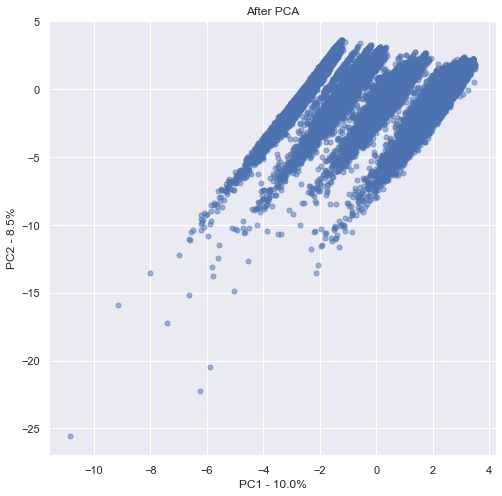

In [70]:
rotatedData = pca.fit_transform(zscoredData)*-1

plt.figure(figsize=(8,8))
plt.plot(rotatedData[:,0],rotatedData[:,1], 'o',markersize=5,alpha =0.5)
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
plt.title('After PCA')
plt.show()

# 3.2 kMeans clustering

We have a transformed data from our princial component analysis. We will use the data related to the first two principal component to perform kMeans clustering. 

Since our hypothesis testing showed that there is female and male are paid differently, we decided to do kMeans clustering to identify how different clusters are for gender categroies (female, male, other and unknown.) kMeans gives you the center coordinates of the clusters, assuming a number of clusters. We used silhouette method to obtain the optimal number of cluster for all gender then separately for each gender categories. 
We tried 10 clusters at first, but noticed that the silhouette score was still increasing for "Other" gender category so we tried 20 cluster and found the following optimal number of clusters:

- All gender: 3 
- Male: 3
- Female: 3
- Other: 17
- Unknown: 2


In [71]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
# Store our transformed data:
X = np.transpose(np.array([rotatedData[:,0],rotatedData[:,1]]))

female_idx = list(selected_stem_data2[selected_stem_data2["gender_Female"] == 1].index)
male_idx = list(selected_stem_data2[selected_stem_data2["gender_Male"] == 1].index)
other_idx = list(selected_stem_data2[selected_stem_data2["gender_Other"] == 1].index)
unknown_idx = list(selected_stem_data2[selected_stem_data2["gender_Unknown"] == 1].index)

female_X = np.transpose(np.array([rotatedData[female_idx,0],rotatedData[female_idx,1]]))
male_X = np.transpose(np.array([rotatedData[male_idx,0],rotatedData[male_idx,1]]))
other_X = np.transpose(np.array([rotatedData[other_idx,0],rotatedData[other_idx,1]]))
unknown_X = np.transpose(np.array([rotatedData[unknown_idx,0],rotatedData[unknown_idx,1]]))

all_X = [X, female_X, male_X, other_X, unknown_X]

In [72]:
numClusters = 9 # how many clusters are we looping over? (from 2 to 20)
all_Q = []

for i in range(5):
    Q = np.empty([numClusters,1]) # init container to store sums
    Q[:] = np.NaN # convert to NaN
    for ii in range(2, 11): # Loop through each cluster (from 2 to 20!)
        arr = all_X[i]
        kMeans = KMeans(n_clusters = int(ii)).fit(arr) # compute kmeans
        cId = kMeans.labels_ # vector of cluster IDs that the row belongs to
        cCoords = kMeans.cluster_centers_ # coordinate location for center of each cluster
        s = silhouette_samples(arr, cId) # compute the mean silhouette coefficient of all samples
        Q[ii-2] = sum(s) # take sum
    all_Q.append(Q)

In [79]:
plot_titles = ["All gender", "Female", "Male", "Other", "Unknown"]

print("Optimal number of clusters using silhouette:\n")
for i in range(len(all_Q)):
    print(plot_titles[i], ":", all_Q[i].argmax()+2)

Optimal number of clusters using silhouette:

All gender : 3
Female : 3
Male : 10
Other : 10
Unknown : 2


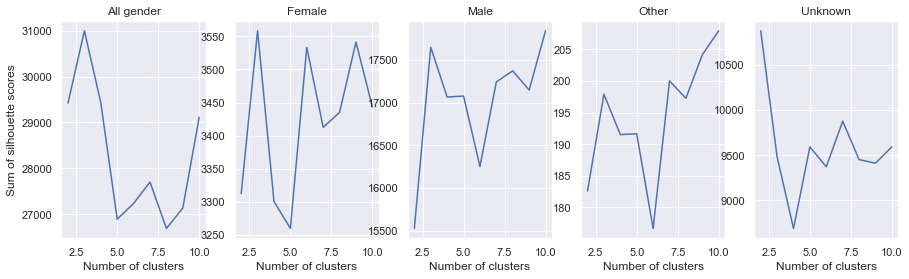

In [74]:

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15,4))

for i in range(0,5):
    ax[i].plot(np.linspace(2, 10, numClusters), all_Q[i])
    ax[i].set_xlabel('Number of clusters')
    if i == 0:
        ax[i].set_ylabel('Sum of silhouette scores')
    ax[i].set_title(plot_titles[i])


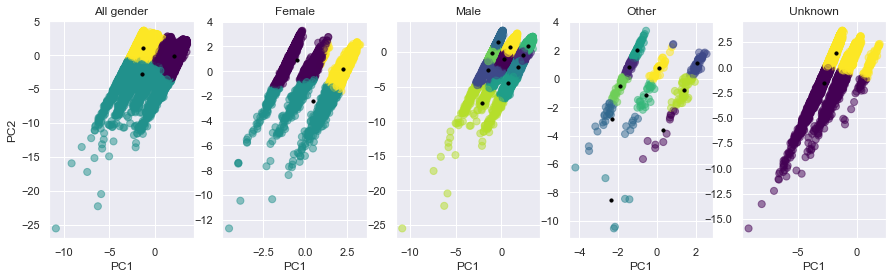

In [80]:
all_num_clusters = [3,3,10,10,2]

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15,4))

for i in range(5):
    kmeans = KMeans(n_clusters=all_num_clusters[i])
    arr=all_X[i]
    kmeans.fit(arr)

    y_kmeans = kmeans.predict(arr)
    centers = kmeans.cluster_centers_

    ax[i].scatter(arr[:, 0], arr[:, 1], c=y_kmeans, s=50, cmap='viridis', alpha=0.5)

    ax[i].scatter(centers[:, 0], centers[:, 1], c='black', s=10);
    ax[i].set_xlabel('PC1')
    if i == 0:
        ax[i].set_ylabel('PC2')
        
    ax[i].set_title(plot_titles[i])
